<a href="https://colab.research.google.com/github/gopal2676/Deep-Learning/blob/master/prognosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import metrics

# Reading dataset

In [4]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data exploration

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
{'unique patients':len(df.id.unique()), 'records':len(df.id)}

{'records': 569, 'unique patients': 569}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


B    357
M    212
Name: diagnosis, dtype: int64

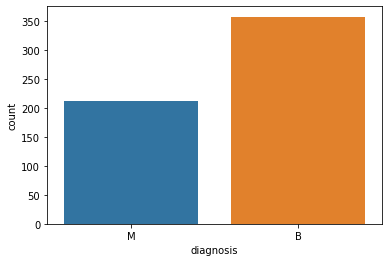

In [9]:
ax = sns.countplot(df.diagnosis,label="Count")       # M = 212, B = 357
df.diagnosis.value_counts()

# Spliting data into train and test 

In [12]:
train_features, test_features, train_labels, test_labels=train_test_split(
    df.drop(['id','diagnosis'], axis=1),
    df[['diagnosis']],
    test_size=0.3)

# Correlated features must be removed

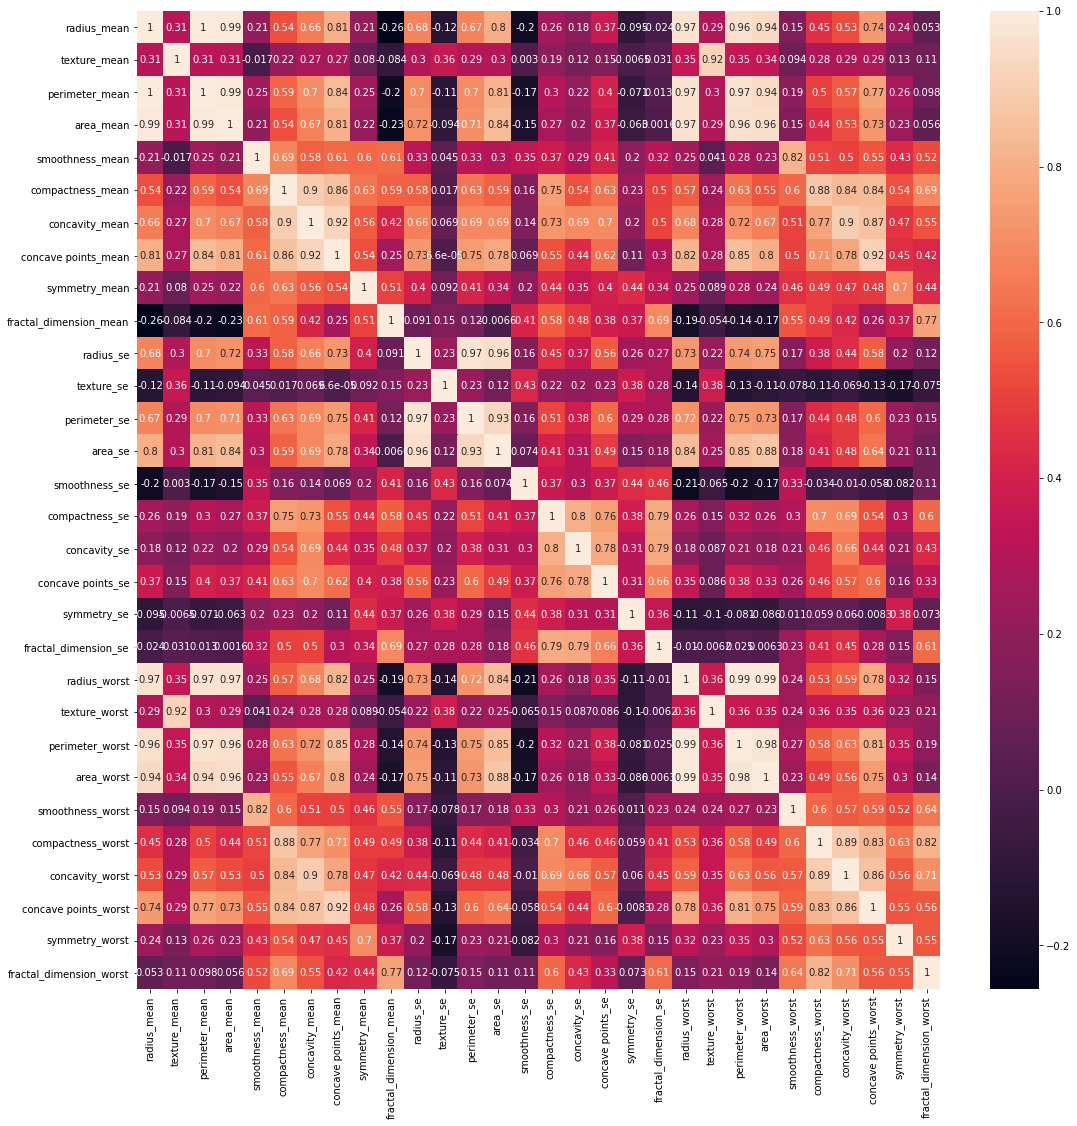

In [13]:
corrMatrix = train_features.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

In [14]:
correlated_features = set()
for i in range(len(corrMatrix .columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > 0.85:
            colname = corrMatrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'concavity_worst', 'concave points_worst', 'concavity_mean', 'radius_worst', 'area_se', 'perimeter_worst', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_worst', 'compactness_worst', 'perimeter_mean', 'texture_worst'}


In [15]:
train_features.drop(labels=correlated_features, axis=1, inplace=True)
test_features.drop(labels=correlated_features, axis=1, inplace=True)

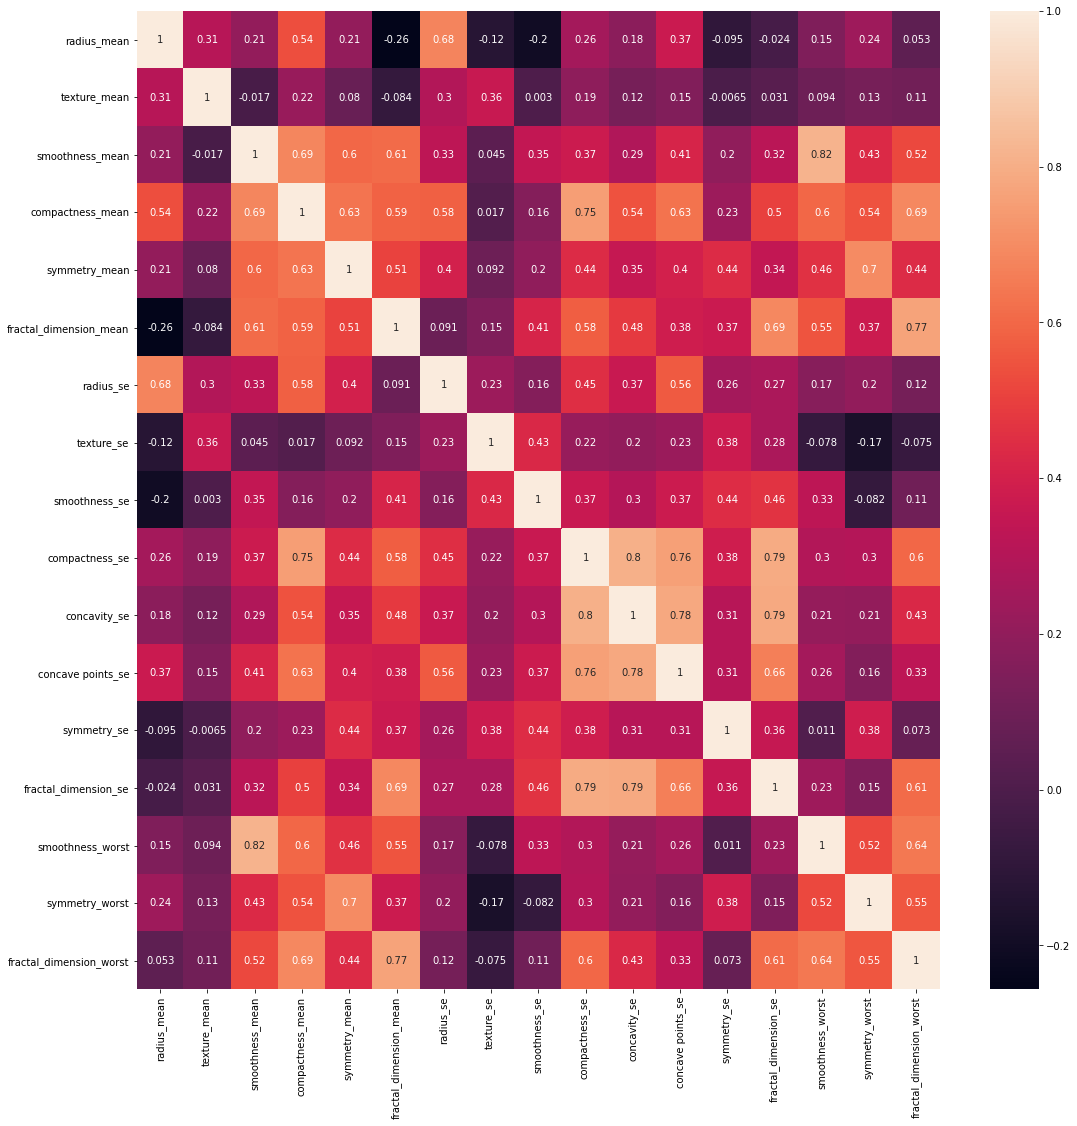

In [16]:
corrMatrix = train_features.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

In [19]:
constant_filter = VarianceThreshold(threshold=0.0)
constant_filter.fit(train_features)
train_features = constant_filter.transform(train_features)
test_features = constant_filter.transform(test_features)

train_features.shape, test_features.shape

((398, 17), (171, 17))

In [20]:
mm_scaler = preprocessing.StandardScaler()
train_features = pd.DataFrame(mm_scaler.fit_transform(train_features))
test_features=pd.DataFrame(mm_scaler.transform(test_features))

# Model Training 

In [22]:
X = train_features
y = train_labels.replace({'B':0,'M':1})
# define the keras model
model = Sequential([Dense(12, input_dim=train_features.shape[1], activation='relu'),
                    Dropout(0.2),
                    Dense(8, activation='relu'),
                    Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=50, batch_size=8)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)

Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.7324 - accuracy: 0.5888
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7264
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7940
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8694
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8897
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.9090
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.9272
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.9402
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9505
Epoch 10/50
50/50 [==============================] - 0s 6ms/step - loss: 0.1685 - accuracy: 0.9780
Epoch 11/50
50/50 [

In [23]:
# make class predictions with the model
y_pred = model.predict_classes(test_features)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Model evaluation

In [24]:
def conf_matrix(matrix,pred):
    class_names= [0,1]# name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

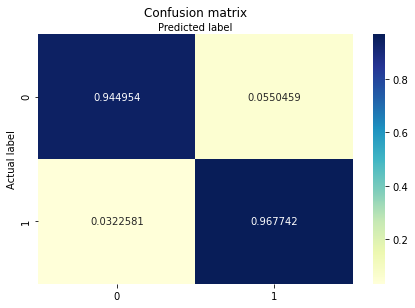

In [25]:
cnf_matrix = metrics.confusion_matrix(y_pred,test_labels.replace({'B':0,'M':1}),normalize='true')
conf_matrix(cnf_matrix,test_labels)

In [26]:
# calculate prediction
report = classification_report(y_pred,test_labels.replace({'B':0,'M':1}))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       109
           1       0.91      0.97      0.94        62

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171

